In [1]:
import numpy as np
from sklearn.metrics import confusion_matrix

In [2]:
import os
import numpy as np
import pandas as pd
#load model
import pickle
os.chdir('/media/tohn/SSD/ModelTrainByImages/R2_6/models/')
filename = "modelrf_fold6_15AB_15AB_1.pkl"
with open(filename, 'rb') as file:
    model = pickle.load(file)

In [3]:
dataframe = pd.read_csv('/home/yupaporn/codes/USAI/FeaturesVector_Testset_15AB_fold6_1.csv')
dataframe = dataframe.drop(['Unnamed: 0'], axis=1)
dataframe

,0,1,2,3,4,5,6,7,8,9,...,2042,2043,2044,2045,2046,2047,Class,SubPosition,Views,Sub_class
0,-0.072010,0.051759,0.024962,-0.188744,0.181235,-0.144683,0.132666,0.045925,-0.145988,-0.219919,...,0.520468,-0.139134,0.116999,-0.043231,0.175243,0.145308,Abnormal,P1,FP-A,AB01
1,0.160372,0.448768,-0.086366,-0.168636,-0.057540,-0.180972,0.138468,0.250461,-0.184845,-0.176031,...,0.486222,-0.140242,0.298856,-0.052733,0.451713,0.266503,Abnormal,P2,FP-A,AB01
2,-0.115102,0.035601,-0.072089,-0.177070,-0.124166,-0.137369,0.386583,-0.073649,-0.194593,-0.124501,...,0.860627,-0.143774,0.049816,0.015568,0.326848,-0.141891,Abnormal,P41,FP-B,AB01
3,0.019314,-0.029648,-0.162179,-0.120850,-0.005383,-0.039309,0.453440,-0.095521,-0.153951,-0.119520,...,0.469563,-0.039133,-0.038760,0.052012,0.335800,0.049068,Abnormal,P51,FP-C,AB01
4,-0.142105,0.831799,0.024896,-0.183886,-0.063158,-0.055395,0.008864,-0.111051,-0.199014,-0.195355,...,0.592475,0.172268,0.066656,-0.028835,0.417188,-0.020365,Abnormal,P31,FP-B,AB01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1307,0.767522,0.216619,-0.111388,-0.161758,0.373666,-0.152046,0.027337,0.171454,0.576713,0.010732,...,0.393154,-0.205213,0.410566,0.253127,0.134695,0.534931,Normal,P32,FP-B,Normal
1308,-0.130795,-0.153761,-0.186357,-0.180258,-0.050074,0.471306,-0.200832,0.398093,-0.199574,0.881409,...,0.101527,-0.114034,-0.055696,0.033872,-0.149672,0.159514,Normal,P42,FP-B,Normal
1309,1.146234,0.198451,-0.137813,0.277931,0.753545,0.197406,-0.091217,-0.104477,-0.123753,-0.178759,...,0.324034,-0.140107,0.424073,0.725875,0.174992,0.383541,Normal,P52,FP-C,Normal
1310,0.469376,-0.176544,-0.129323,-0.193529,-0.157068,-0.038316,0.006170,0.059375,-0.080200,0.019664,...,0.206462,-0.212651,-0.116854,0.129628,-0.094546,0.333042,Normal,P61,FP-C,Normal


In [4]:
X_test = dataframe.iloc[:,0:2048]
y_test = dataframe.iloc[:,2051]
print(X_test.shape)
print(y_test.shape)

(1312, 2048)
(1312,)


In [5]:
X_test

,0,1,2,3,4,5,6,7,8,9,...,2038,2039,2040,2041,2042,2043,2044,2045,2046,2047
0,-0.072010,0.051759,0.024962,-0.188744,0.181235,-0.144683,0.132666,0.045925,-0.145988,-0.219919,...,-0.165648,-0.214657,0.409280,0.085223,0.520468,-0.139134,0.116999,-0.043231,0.175243,0.145308
1,0.160372,0.448768,-0.086366,-0.168636,-0.057540,-0.180972,0.138468,0.250461,-0.184845,-0.176031,...,-0.148916,-0.183655,0.240547,0.118372,0.486222,-0.140242,0.298856,-0.052733,0.451713,0.266503
2,-0.115102,0.035601,-0.072089,-0.177070,-0.124166,-0.137369,0.386583,-0.073649,-0.194593,-0.124501,...,-0.106495,-0.198382,0.739474,-0.124371,0.860627,-0.143774,0.049816,0.015568,0.326848,-0.141891
3,0.019314,-0.029648,-0.162179,-0.120850,-0.005383,-0.039309,0.453440,-0.095521,-0.153951,-0.119520,...,-0.169459,-0.138359,0.629330,0.090534,0.469563,-0.039133,-0.038760,0.052012,0.335800,0.049068
4,-0.142105,0.831799,0.024896,-0.183886,-0.063158,-0.055395,0.008864,-0.111051,-0.199014,-0.195355,...,-0.112054,-0.170762,0.256373,-0.005143,0.592475,0.172268,0.066656,-0.028835,0.417188,-0.020365
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1307,0.767522,0.216619,-0.111388,-0.161758,0.373666,-0.152046,0.027337,0.171454,0.576713,0.010732,...,0.329977,-0.083092,0.229216,0.946474,0.393154,-0.205213,0.410566,0.253127,0.134695,0.534931
1308,-0.130795,-0.153761,-0.186357,-0.180258,-0.050074,0.471306,-0.200832,0.398093,-0.199574,0.881409,...,0.390413,-0.131447,0.133145,0.103089,0.101527,-0.114034,-0.055696,0.033872,-0.149672,0.159514
1309,1.146234,0.198451,-0.137813,0.277931,0.753545,0.197406,-0.091217,-0.104477,-0.123753,-0.178759,...,-0.146558,-0.171855,0.259906,0.232242,0.324034,-0.140107,0.424073,0.725875,0.174992,0.383541
1310,0.469376,-0.176544,-0.129323,-0.193529,-0.157068,-0.038316,0.006170,0.059375,-0.080200,0.019664,...,0.233778,-0.193781,-0.203375,0.181735,0.206462,-0.212651,-0.116854,0.129628,-0.094546,0.333042


In [6]:
y_test

0         AB01
1         AB01
2         AB01
3         AB01
4         AB01
         ...  
1307    Normal
1308    Normal
1309    Normal
1310    Normal
1311    Normal
Name: Sub_class, Length: 1312, dtype: object

In [7]:
y_pred = model.predict(X_test)

In [8]:
dataframe['Sub_class_pred'] = y_pred
dataframe

,0,1,2,3,4,5,6,7,8,9,...,2043,2044,2045,2046,2047,Class,SubPosition,Views,Sub_class,Sub_class_pred
0,-0.072010,0.051759,0.024962,-0.188744,0.181235,-0.144683,0.132666,0.045925,-0.145988,-0.219919,...,-0.139134,0.116999,-0.043231,0.175243,0.145308,Abnormal,P1,FP-A,AB01,Normal
1,0.160372,0.448768,-0.086366,-0.168636,-0.057540,-0.180972,0.138468,0.250461,-0.184845,-0.176031,...,-0.140242,0.298856,-0.052733,0.451713,0.266503,Abnormal,P2,FP-A,AB01,AB01
2,-0.115102,0.035601,-0.072089,-0.177070,-0.124166,-0.137369,0.386583,-0.073649,-0.194593,-0.124501,...,-0.143774,0.049816,0.015568,0.326848,-0.141891,Abnormal,P41,FP-B,AB01,AB01
3,0.019314,-0.029648,-0.162179,-0.120850,-0.005383,-0.039309,0.453440,-0.095521,-0.153951,-0.119520,...,-0.039133,-0.038760,0.052012,0.335800,0.049068,Abnormal,P51,FP-C,AB01,AB01
4,-0.142105,0.831799,0.024896,-0.183886,-0.063158,-0.055395,0.008864,-0.111051,-0.199014,-0.195355,...,0.172268,0.066656,-0.028835,0.417188,-0.020365,Abnormal,P31,FP-B,AB01,AB02
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1307,0.767522,0.216619,-0.111388,-0.161758,0.373666,-0.152046,0.027337,0.171454,0.576713,0.010732,...,-0.205213,0.410566,0.253127,0.134695,0.534931,Normal,P32,FP-B,Normal,Normal
1308,-0.130795,-0.153761,-0.186357,-0.180258,-0.050074,0.471306,-0.200832,0.398093,-0.199574,0.881409,...,-0.114034,-0.055696,0.033872,-0.149672,0.159514,Normal,P42,FP-B,Normal,Normal
1309,1.146234,0.198451,-0.137813,0.277931,0.753545,0.197406,-0.091217,-0.104477,-0.123753,-0.178759,...,-0.140107,0.424073,0.725875,0.174992,0.383541,Normal,P52,FP-C,Normal,Normal
1310,0.469376,-0.176544,-0.129323,-0.193529,-0.157068,-0.038316,0.006170,0.059375,-0.080200,0.019664,...,-0.212651,-0.116854,0.129628,-0.094546,0.333042,Normal,P61,FP-C,Normal,Normal


In [9]:
act = dataframe['Sub_class'].map({'AB12':1, 'AB04':1, 'AB05':1, 'Normal':0, 'AB02':1, 'AB11':1, 'AB082':1, 'AB06':1,'AB07':1, 'AB081':1, 'AB09':1, 'AB03':1, 'AB10':1, 'AB01':1, 'AB083':1}).values
pred = dataframe['Sub_class_pred'].map({'AB12':1, 'AB04':1, 'AB05':1, 'Normal':0, 'AB02':1, 'AB11':1, 'AB082':1, 'AB06':1,'AB07':1, 'AB081':1, 'AB09':1, 'AB03':1, 'AB10':1, 'AB01':1, 'AB083':1}).values
cmat = confusion_matrix(act, pred)
print('classifier accuracy = {}%'.format((100.*np.trace(cmat))/(np.sum(cmat))))

#Marking the Confusion Matrix
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(act, pred))#performance

classifier accuracy = 91.92073170731707%
              precision    recall  f1-score   support

           0       0.89      0.99      0.94       857
           1       0.99      0.78      0.87       455

    accuracy                           0.92      1312
   macro avg       0.94      0.89      0.91      1312
weighted avg       0.93      0.92      0.92      1312



852 5 101 354


Text(0.5, 21.5, 'Predicted label')

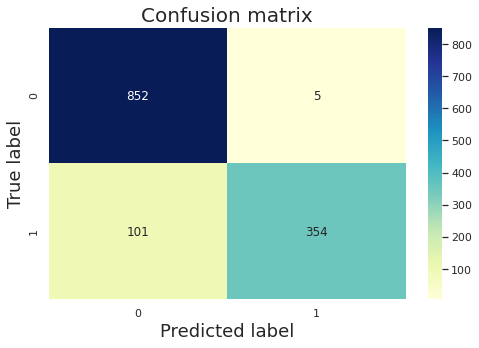

In [10]:
#create CF 
data = {'Actual': act,'Predicted' : pred,}
df = pd.DataFrame(data, columns=['Actual','Predicted'])
conf_mat = pd.crosstab(df['Actual'],df['Predicted'],rownames=['Actual'],colnames=['Predicted'])

#Confusion matrix
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
cm = confusion_matrix(act, pred)
TN, FP, FN, TP = confusion_matrix(act, pred).ravel()
print(TN, FP, FN, TP)
#plot Confusion matrix
import seaborn as sns
sns.set()
fig, ax = plt.subplots(figsize=(8, 5))

ax = sns.heatmap(conf_mat, annot=True, fmt="d", cmap="YlGnBu") #Blues,Oranges,Reds
ax.set_title('Confusion matrix',fontsize=20)
ax.set_ylabel('True label',fontsize=18)
ax.set_xlabel('Predicted label',fontsize=18)

In [11]:
TN, FP, FN, TP = confusion_matrix(act, pred).ravel()
print('TN = ', TN)
print('FP = ', FP)
print('FN = ', FN)
print('TP = ', TP)

TN =  852
FP =  5
FN =  101
TP =  354


In [12]:
#Marking the Confusion Matrix
from sklearn.metrics import classification_report,confusion_matrix
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))#performance

[[ 45   9   0   0   0   0   0   0   0   0   0   0   0   1  19]
 [  7  39   8   0   0   0   0   1   0   0   0   0   0   0   5]
 [  0  12   5   0   0   0   0   0   0   0   0   0   0   1   0]
 [  0   0   0  25   0   0   0   1   0   0   0   0   0   2  15]
 [  0   0   0   0  16   0   0   0   0   0   0   0   0   1  12]
 [  0   0   0   0   0   9   1   1   0   0   0   0   0   0  10]
 [  0   0   0   0   0   1  10   0   0   0   0   0   0   0  10]
 [  2   0   0   0   0   0   0  20   0   0   0   0   0   3   7]
 [  0   0   0   0   1   0   0   3  18   1   0   0   0   0   5]
 [  0   0   0   0   0   0   0   1   5   2   0   0   0   2   1]
 [  0   0   1   1   0   0   0   0   0   0  18   0   0   1   5]
 [  0   0   0   0   0   0   0   0   0   0   1   5   0   0   4]
 [  0   0   0   0   0   0   0   0   0   0   0   0  14   6   3]
 [  0   0   0   2   0   0   0   0   0   0   0   0   0  52   5]
 [  2   1   0   0   1   0   1   0   0   0   0   0   0   0 852]]
              precision    recall  f1-score   support


Text(0.5, 21.5, 'Predicted label')

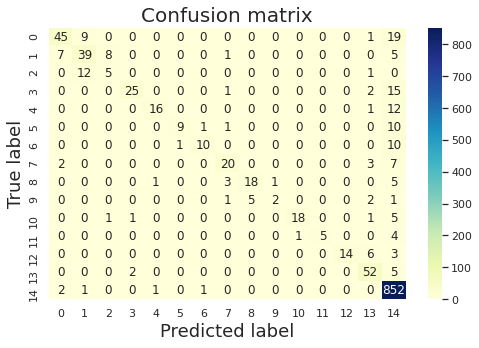

In [13]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
cm = confusion_matrix(y_test, y_pred)

import seaborn as sns
sns.set()
fig, ax = plt.subplots(figsize=(8, 5))

ax = sns.heatmap(cm, annot=True, fmt="d", cmap="YlGnBu") #Blues,Oranges,Reds
ax.set_title('Confusion matrix',fontsize=20)
ax.set_ylabel('True label',fontsize=18)
ax.set_xlabel('Predicted label',fontsize=18)